## Sensitivity of the simulation 

We want to know how sensitive a particular metric is to resolution and tuning coeff. 

In [7]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid
from datatree import open_datatree, DataTree 

import sys
sys.path.append('../modules/')
sys.path.append('../online_analysis_Greene/exp_gen_scripts/')
%reload_ext autoreload
%autoreload 2

In [8]:
from prepare_experiments import load_config
from P2L_sim_analysis_modules import create_leaf, analyze_sims

In [9]:
import P2L_sim_analysis_modules as sam

In [10]:
res = [10, 20, 40, 80]
res_bins = [5, 15, 30, 60, 100]
C_ANN          = np.array([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0])
C_ANN_bins = np.array([-0.1, 0.125, 0.325, 0.625, 0.825, 1.125, 1.325,1.625, 1.825, 2.125, 2.325, 2.75, 3.5])
C_GM = np.array([10, 50, 100, 500, 1000, 2000, 4000, 8000, 12000])/1000
C_GM_bins = np.array([0, 25, 75, 300, 750, 1500, 3000, 6000, 10000, 14000])
model_types = ['ANN', 'GM1000']

exp_dir = '/scratch/db194/mom6/base_experiments_2025/Phillip2Layer/27Mar/'

In [11]:
len(C_ANN_bins)

13

In [12]:
C_GM_offline_P2L = [137, 596, 2287, 6266]

In [13]:
# Load HR model
dir_HR = '/scratch/db194/mom6/base_experiments_2025/Phillip2Layer/Phillips_2layer_4km/'
ds_HR = xr.open_dataset(dir_HR+'prog.nc', decode_times=False)

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [14]:
ds_HR = sam.add_HR_transport(ds_HR)

In [15]:
# Load all LR models
model_type_dic = {}
for ANN_type in model_types: 
    
    res_dic = {}
    for r in res: 
        r = str(r)
        #exp_dic[ANN_type][r] = {}
        if ANN_type == 'ANN':
            C = C_ANN
        elif ANN_type == 'GM1000':
            C = C_GM

         
        coeff_dic = {}
        for coeff in C: 
            coeff = str(coeff)
            #exp_dic[ANN_type][r][coeff] = {}
            exp_name = 'res_' + str(r) + 'km_' + str(ANN_type) + '_' + str(coeff)
            print('Reading :' + exp_name)
            run_dic = {}
            
            run_dic['prog']     = xr.open_mfdataset(exp_dir + 'runs/' + exp_name + '/OUTPUT/prog_*.nc', decode_times=False)
            run_dic['ave_prog'] = xr.open_mfdataset(exp_dir + 'runs/' + exp_name + '/OUTPUT/ave_prog_*.nc', decode_times=False)
            run_dic['oce_geom'] = xr.open_dataset(exp_dir + 'runs/' + exp_name + '/OUTPUT/ocean_geometry.nc', decode_times=False)
            
            coeff_dic[coeff] = DataTree.from_dict(run_dic)
            
        res_dic[r] = DataTree.from_dict(coeff_dic)

    model_type_dic[ANN_type] = DataTree.from_dict(res_dic)

exp_tree = DataTree.from_dict(model_type_dic)    

Reading :res_10km_ANN_0.0
Reading :res_10km_ANN_0.25
Reading :res_10km_ANN_0.5
Reading :res_10km_ANN_0.75
Reading :res_10km_ANN_1.0
Reading :res_10km_ANN_1.25
Reading :res_10km_ANN_1.5
Reading :res_10km_ANN_1.75
Reading :res_10km_ANN_2.0
Reading :res_10km_ANN_2.25
Reading :res_10km_ANN_2.5
Reading :res_10km_ANN_3.0
Reading :res_20km_ANN_0.0
Reading :res_20km_ANN_0.25
Reading :res_20km_ANN_0.5
Reading :res_20km_ANN_0.75
Reading :res_20km_ANN_1.0
Reading :res_20km_ANN_1.25
Reading :res_20km_ANN_1.5
Reading :res_20km_ANN_1.75
Reading :res_20km_ANN_2.0
Reading :res_20km_ANN_2.25
Reading :res_20km_ANN_2.5
Reading :res_20km_ANN_3.0
Reading :res_40km_ANN_0.0
Reading :res_40km_ANN_0.25
Reading :res_40km_ANN_0.5
Reading :res_40km_ANN_0.75
Reading :res_40km_ANN_1.0
Reading :res_40km_ANN_1.25
Reading :res_40km_ANN_1.5
Reading :res_40km_ANN_1.75
Reading :res_40km_ANN_2.0
Reading :res_40km_ANN_2.25
Reading :res_40km_ANN_2.5
Reading :res_40km_ANN_3.0
Reading :res_80km_ANN_0.0
Reading :res_80km_ANN_0

In [16]:
exp_tree = exp_tree.map_over_subtree(sam.add_transport_metrics)

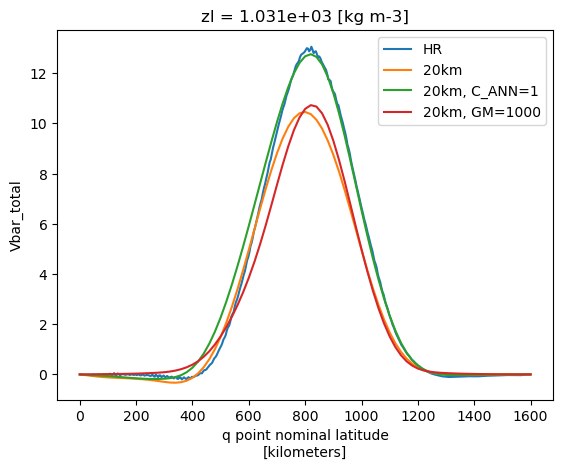

In [17]:
zl = 0
ds_HR['Vbar_resolved'].isel(zl=zl).plot(label='HR')
exp_tree['ANN']['20']['0.0']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km')
exp_tree['ANN']['20']['1.0']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km, C_ANN=1')
exp_tree['GM1000']['20']['1.0']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km, GM=1000')
plt.legend()


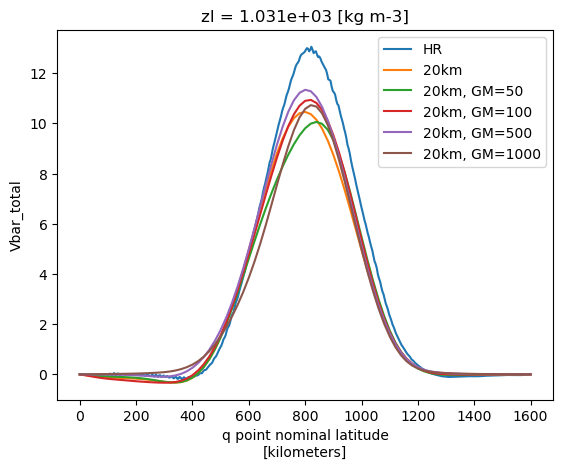

In [18]:
zl = 0
ds_HR['Vbar_resolved'].isel(zl=zl).plot(label='HR')
exp_tree['ANN']['20']['0.0']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km')
exp_tree['GM1000']['20']['0.05']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km, GM=50')
exp_tree['GM1000']['20']['0.1']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km, GM=100')
exp_tree['GM1000']['20']['0.5']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km, GM=500')
exp_tree['GM1000']['20']['1.0']['ave_prog'].Vbar_total.isel(zl=zl).plot(label='20km, GM=1000')
plt.legend()


In [19]:
Vbar_max_HR = np.max(ds_HR.Vbar_resolved.isel(zl=zl).values)

In [20]:
Vbar_max_ANN = np.zeros((len(res), len(C_ANN)))
zl = 0
for i, r in enumerate(res):
    for j, c in enumerate(C_ANN):
        Vbar_max_ANN[i][j] = np.max(exp_tree['ANN'][str(r)][str(c)]['ave_prog'].Vbar_total.isel(zl=zl))

In [21]:
Vbar_resolved_max_ANN = np.zeros((len(res), len(C_ANN)))
Vbar_param_max_ANN = np.zeros((len(res), len(C_ANN)))

zl = 0
for i, r in enumerate(res):
    for j, c in enumerate(C_ANN):
        Vbar_resolved_max_ANN[i][j] = np.max(exp_tree['ANN'][str(r)][str(c)]['ave_prog'].Vbar_resolved.isel(zl=zl))
        Vbar_param_max_ANN[i][j] = np.max(exp_tree['ANN'][str(r)][str(c)]['ave_prog'].Vbar_param.isel(zl=zl))

In [22]:
Vbar_max_GM = np.zeros((len(res), len(C_GM)))
zl = 0
for i, r in enumerate(res):
    for j, c in enumerate(C_GM):
        Vbar_max_GM[i][j] = np.max(exp_tree['GM1000'][str(r)][str(c)]['ave_prog'].Vbar_total.isel(zl=zl))

In [23]:
Vbar_resolved_max_GM = np.zeros((len(res), len(C_GM)))
Vbar_param_max_GM = np.zeros((len(res), len(C_GM)))

zl = 0
for i, r in enumerate(res):
    for j, c in enumerate(C_GM):
        Vbar_resolved_max_GM[i][j] = np.max(exp_tree['GM1000'][str(r)][str(c)]['ave_prog'].Vbar_resolved.isel(zl=zl))
        Vbar_param_max_GM[i][j] = np.max(exp_tree['GM1000'][str(r)][str(c)]['ave_prog'].Vbar_param.isel(zl=zl))

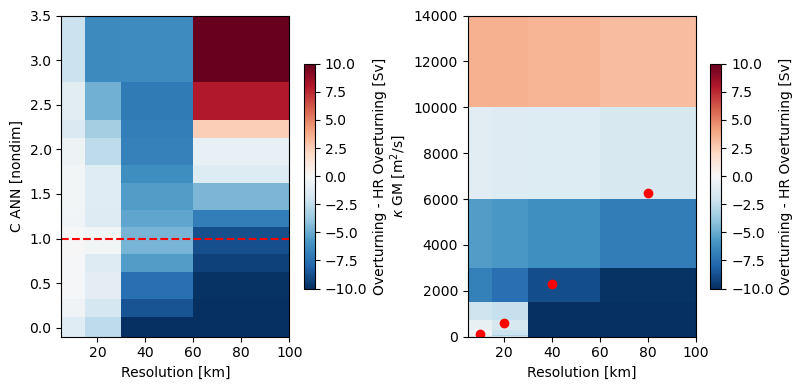

In [21]:
plt.figure(figsize=(8,4))

plt.subplot(121)
#levels = np.linspace(-13, 13, 27)
levels = np.linspace(-7, 7, 27)
max_vals = 10
cf = plt.pcolormesh(res_bins, C_ANN_bins, (Vbar_max_ANN - Vbar_max_HR).T, cmap='RdBu_r',  
                    vmin=-max_vals, vmax=max_vals)

plt.hlines(1, min(res_bins), max(res_bins), linestyle='dashed', colors='r')

# Colorbar and labels
plt.colorbar(cf, label='Overturning - HR Overturning [Sv]', shrink=0.7)
plt.xlabel('Resolution [km]')
plt.ylabel('C ANN [nondim]')

plt.subplot(122)
# Filled contours
cf = plt.pcolormesh(res_bins, C_GM_bins, (Vbar_max_GM - Vbar_max_HR).T, cmap='RdBu_r',  
                    vmin=-max_vals, vmax=max_vals)

for i, r in enumerate(res):
    plt.plot(res[i], C_GM_offline_P2L[i], marker='o', color='r')

# Colorbar and labels
cbar = plt.colorbar(cf, label='Overturning - HR Overturning [Sv]', shrink=0.7)
#cbar.ax.tick_params(labelrotation=45)  # Rotate tick labels

plt.xlabel('Resolution [km]')
plt.ylabel('$\kappa$ GM [m$^2$/s]')

plt.tight_layout()
plt.savefig('Figures/sensitivity_P2L.png')

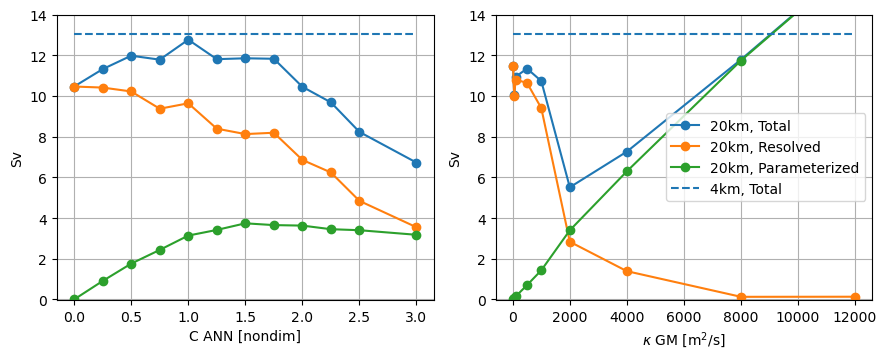

In [41]:
plt.figure(figsize=(9,3.7))

res_n = 1

plt.subplot(122)
plt.plot(C_GM*1e3, Vbar_max_GM[res_n][:] , 'o-', label='20km, Total')
plt.plot(C_GM*1e3, Vbar_resolved_max_GM[res_n][:] , 'o-', label='20km, Resolved')
plt.plot(C_GM*1e3, Vbar_param_max_GM[res_n][:] , 'o-', label='20km, Parameterized')
plt.hlines(Vbar_max_HR, 0 , 12*1e3, linestyle='--', label='4km, Total')
plt.grid()
plt.ylim(-0.02, 14)
plt.xlabel('$\kappa$ GM [m$^2$/s]')
plt.ylabel('Sv') 
plt.legend(loc='center right')

plt.subplot(121)
plt.plot(C_ANN, Vbar_max_ANN[res_n][:] , 'o-', label='20km, Total')
plt.plot(C_ANN, Vbar_resolved_max_ANN[res_n][:] , 'o-', label='20km, Resolved')
plt.plot(C_ANN, Vbar_param_max_ANN[res_n][:] , 'o-', label='20km, Parameterized')
plt.hlines(Vbar_max_HR, 0 , 3, linestyle='--', label='4km, Total')
plt.grid()
plt.xlabel('C ANN [nondim]')
plt.ylabel('Sv') 
plt.ylim(-0.02, 14)
#plt.legend(loc='center right')

plt.tight_layout()

plt.savefig('Figures/sensitivity_P2L_20km_GM.png')


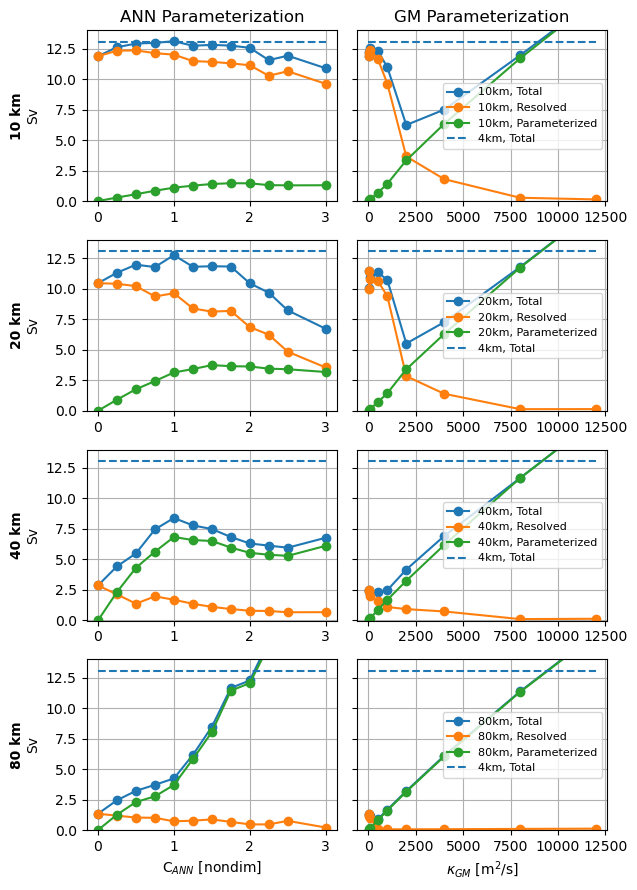

In [72]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False  # Optional, for full LaTeX rendering

res_range = ['10', '20', '40', '80']

fig, axes = plt.subplots(4, 2, figsize=(6.5, 9), sharex=False, sharey=True)

for row, res_n in enumerate(res_range):
    # --- GM Panel (Right) ---
    ax = axes[row, 1]
    ax.plot(C_GM * 1e3, Vbar_max_GM[row], 'o-', label=res_n + 'km, Total')
    ax.plot(C_GM * 1e3, Vbar_resolved_max_GM[row], 'o-', label=res_n + 'km, Resolved')
    ax.plot(C_GM * 1e3, Vbar_param_max_GM[row], 'o-', label=res_n + 'km, Parameterized')
    ax.hlines(Vbar_max_HR, 0, 12e3, linestyle='--', label='4km, Total')
    ax.set_ylim(-0.02, 14)
    if row == 3:
        ax.set_xlabel(r'$\kappa_{GM}$ [m$^2$/s]')
    if row == 0:
        ax.set_title('GM Parameterization')
    ax.legend(loc='center right', fontsize=8)
    ax.grid(True)
    #ax.set_ylabel('Sv')

    # --- ANN Panel (Left) ---
    ax = axes[row, 0]
    ax.plot(C_ANN, Vbar_max_ANN[row], 'o-', label=res_n + 'km, Total')
    ax.plot(C_ANN, Vbar_resolved_max_ANN[row], 'o-', label=res_n + 'km, Resolved')
    ax.plot(C_ANN, Vbar_param_max_ANN[row], 'o-', label=res_n + 'km, Parameterized')
    ax.hlines(Vbar_max_HR, 0, 3, linestyle='--', label='4km, Total')
    ax.set_ylim(-0.02, 14)
    if row == 3:
        ax.set_xlabel('C$_{ANN}$ [nondim]')
    if row == 0:
        ax.set_title('ANN Parameterization')
    ax.grid(True)
    ax.set_ylabel('Sv')

    # Optional: Label each row on the far left
    axes[row, 0].annotate(res_n + ' km',
                      xy=(-0.25, 0.5),
                      xycoords='axes fraction',
                      fontsize=10,
                      ha='right',
                      va='center',
                      rotation=90,
                      fontweight='bold')

    # axes[row, 0].annotate(r'\textbf{' + res_n + ' km}',
    #                       xy=(-0.24, 0.5),
    #                       xycoords='axes fraction',
    #                       fontsize=10,
    #                       ha='right',
    #                       va='center',
    #                       rotation=90)

# Adjust layout for padding
fig.subplots_adjust(left=0.10, right=0.98, top=0.94, bottom=0.06, hspace=0.25, wspace=0.2)
plt.tight_layout()
# Save or show
plt.savefig('Figures/sensitivity_P2L_multirow.png', dpi=300)
#plt.show()


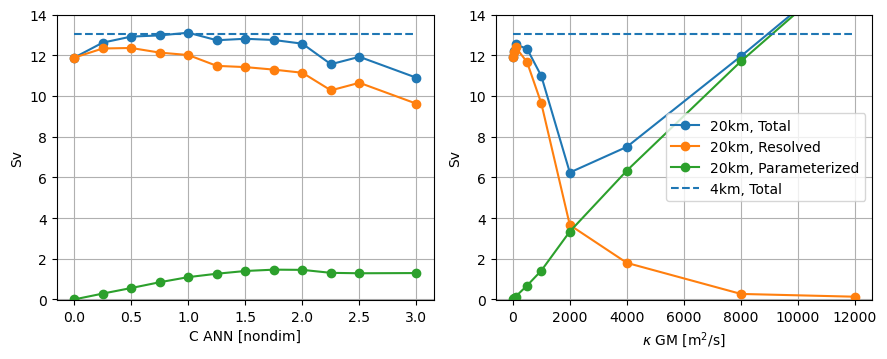

In [42]:
plt.figure(figsize=(9,3.7))

res_n = 0

plt.subplot(122)
plt.plot(C_GM*1e3, Vbar_max_GM[res_n][:] , 'o-', label='20km, Total')
plt.plot(C_GM*1e3, Vbar_resolved_max_GM[res_n][:] , 'o-', label='20km, Resolved')
plt.plot(C_GM*1e3, Vbar_param_max_GM[res_n][:] , 'o-', label='20km, Parameterized')
plt.hlines(Vbar_max_HR, 0 , 12*1e3, linestyle='--', label='4km, Total')
plt.grid()
plt.ylim(-0.02, 14)
plt.xlabel('$\kappa$ GM [m$^2$/s]')
plt.ylabel('Sv') 
plt.legend(loc='center right')

plt.subplot(121)
plt.plot(C_ANN, Vbar_max_ANN[res_n][:] , 'o-', label='20km, Total')
plt.plot(C_ANN, Vbar_resolved_max_ANN[res_n][:] , 'o-', label='20km, Resolved')
plt.plot(C_ANN, Vbar_param_max_ANN[res_n][:] , 'o-', label='20km, Parameterized')
plt.hlines(Vbar_max_HR, 0 , 3, linestyle='--', label='4km, Total')
plt.grid()
plt.xlabel('C ANN [nondim]')
plt.ylabel('Sv') 
plt.ylim(-0.02, 14)
#plt.legend(loc='center right')

plt.tight_layout()

#plt.savefig('Figures/sensitivity_P2L_20km_GM.png')


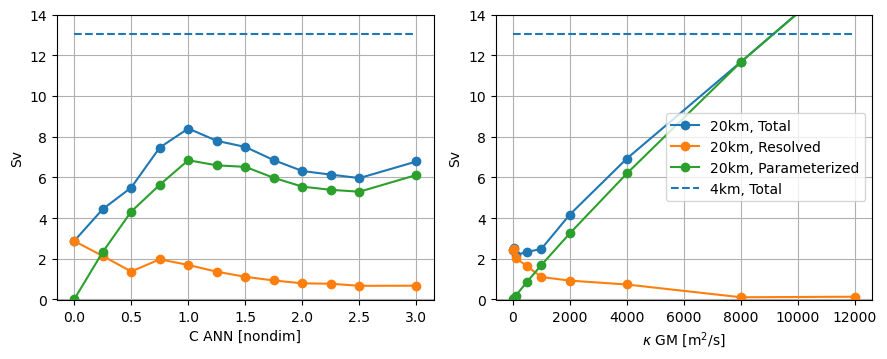

In [44]:
plt.figure(figsize=(9,3.7))

res_n = 2

plt.subplot(122)
plt.plot(C_GM*1e3, Vbar_max_GM[res_n][:] , 'o-', label='20km, Total')
plt.plot(C_GM*1e3, Vbar_resolved_max_GM[res_n][:] , 'o-', label='20km, Resolved')
plt.plot(C_GM*1e3, Vbar_param_max_GM[res_n][:] , 'o-', label='20km, Parameterized')
plt.hlines(Vbar_max_HR, 0 , 12*1e3, linestyle='--', label='4km, Total')
plt.grid()
plt.ylim(-0.02, 14)
plt.xlabel('$\kappa$ GM [m$^2$/s]')
plt.ylabel('Sv') 
plt.legend(loc='center right')

plt.subplot(121)
plt.plot(C_ANN, Vbar_max_ANN[res_n][:] , 'o-', label='20km, Total')
plt.plot(C_ANN, Vbar_resolved_max_ANN[res_n][:] , 'o-', label='20km, Resolved')
plt.plot(C_ANN, Vbar_param_max_ANN[res_n][:] , 'o-', label='20km, Parameterized')
plt.hlines(Vbar_max_HR, 0 , 3, linestyle='--', label='4km, Total')
plt.grid()
plt.xlabel('C ANN [nondim]')
plt.ylabel('Sv') 
plt.ylim(-0.02, 14)
#plt.legend(loc='center right')

plt.tight_layout()

plt.savefig('Figures/sensitivity_P2L_20km_GM.png')


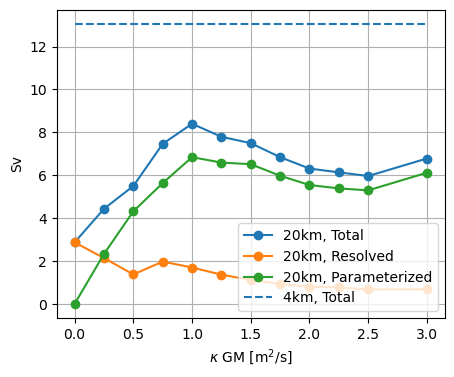

In [40]:
plt.figure(figsize=(5,4))
plt.plot(C_ANN, Vbar_max_ANN[2][:] , 'o-', label='20km, Total')
plt.plot(C_ANN, Vbar_resolved_max_ANN[2][:] , 'o-', label='20km, Resolved')
plt.plot(C_ANN, Vbar_param_max_ANN[2][:] , 'o-', label='20km, Parameterized')
plt.hlines(Vbar_max_HR, 0 , 3, linestyle='--', label='4km, Total')
plt.grid()
plt.xlabel('$\kappa$ GM [m$^2$/s]')
plt.ylabel('Sv') 
plt.legend(loc='lower right')

#plt.savefig('Figures/sensitivity_P2L_20km_GM.png')

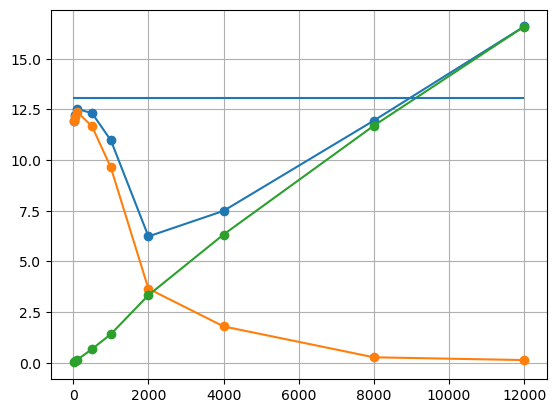

In [34]:
plt.plot(C_GM*1e3, Vbar_max_GM[0][:] , 'o-')
plt.plot(C_GM*1e3, Vbar_resolved_max_GM[0][:] , 'o-')
plt.plot(C_GM*1e3, Vbar_param_max_GM[0][:] , 'o-')
plt.hlines(Vbar_max_HR, 0 , 12*1e3)
plt.grid()

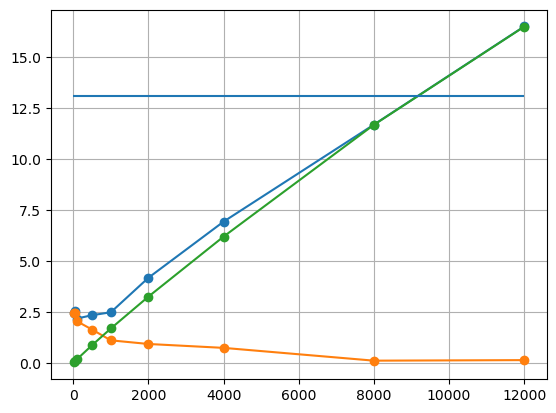

In [35]:
plt.plot(C_GM*1e3, Vbar_max_GM[2][:] , 'o-')
plt.plot(C_GM*1e3, Vbar_resolved_max_GM[2][:] , 'o-')
plt.plot(C_GM*1e3, Vbar_param_max_GM[2][:] , 'o-')
plt.hlines(Vbar_max_HR, 0 , 12*1e3)
plt.grid()